In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
titanic = pd.read_csv("train.csv")
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [18]:
df_mean_tit = titanic.copy()

In [39]:
means = df_mean_tit.Survived.groupby(df_mean_tit.Sex).mean()
means
df_mean_tit['Sex_Encoded'] = df_mean_tit.Sex.map(means)
display(df_mean_tit)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.188908
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.742038
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.742038
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.742038
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.188908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.188908
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.742038
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.742038
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.188908


### EMBARKED ENCODER

Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [10]:
import pandas as pd
df_enc_embarked = titanic.copy()

In [11]:
df_enc_embarked.Embarked.isnull().sum()

2

In [12]:
df_enc_embarked.Embarked.mode()

0    S
dtype: object

In [13]:
df_enc_embarked = df_enc_embarked.fillna(df_enc_embarked.Embarked.mode()[0])
df_enc_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,S,1,2,W./C. 6607,23.4500,S,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [14]:
df_enc_embarked.Embarked.isnull().sum() #Öncelikle embarked içerisindeki null değerleri mod ile doldurdum.

0

In [17]:
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder(sparse=False)
df_enc = ohe.fit_transform(df_enc_embarked[['Embarked']]).astype(np.uint8)
df_enc

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [17]:
pd.DataFrame(df_enc, index = titanic.index, columns = ["C", "Q", "S"]) #Embarked encode edildi.

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [169]:
pd.DataFrame(data=df_enc).columns

RangeIndex(start=0, stop=3, step=1)

Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

### Cabin Encoding

In [18]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
df_cab = titanic.copy()

In [21]:
df_cab

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [347]:
pd.DataFrame(titanic.Cabin).index

RangeIndex(start=0, stop=891, step=1)

In [355]:
df_cab.iloc[150:160]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S
158,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S


In [364]:
df_cab.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [22]:
df_cab.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
F2             3
              ..
A32            1
C110           1
B101           1
C148           1
E31            1
Name: Cabin, Length: 147, dtype: int64

In [24]:
df_abc = df_cab["Cabin"].fillna(df_cab["Cabin"].mode()[0]) #Null verileri doldurduk.
df_abc.to_frame()

,Cabin
0,B96 B98
1,C85
2,B96 B98
3,C123
4,B96 B98
...,...
886,B96 B98
887,B42
888,B96 B98
889,C148


In [25]:
df_abc.isnull().sum()

0

In [26]:
df_abc

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
lbl = LabelEncoder()

In [44]:
lbl

LabelEncoder()

In [46]:
df_abc["Cabin_encoded"] = lbl.fit_transform(df_abc)
df_abc.to_frame()

,Cabin
0,B96 B98
1,C85
2,B96 B98
3,C123
4,B96 B98
...,...
887,B42
888,B96 B98
889,C148
890,B96 B98


In [ ]:
df_abc.to_frame()

In [48]:
df_abc.loc["Cabin_encoded"]

array([ 47,  81,  47,  55,  47,  47, 129,  47,  47,  47, 145,  49,  47,
        47,  47,  47,  47,  47,  47,  47,  47, 111,  47,  13,  47,  47,
        47,  63,  47,  47,  47,  41,  47,  47,  47,  47,  47,  47,  47,
        47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  47,
       101,  47,  23,  71,  47,  47,  47,  47,  47,  21,  80,  47,  47,
        47, 142,  47,  47,  47,  47,  47,  47,  47,  47, 140,  47,  47,
        47,  47,  47,  47,  47,  47,  47,  47,  47,  47,  63,  47,  47,
        47, 122,  47,  47,  47,  12,  91,  47,  47,  47,  47,  98,  47,
        47,  47,  47,  47,  47,  47,  52,  47,  47,  47,  47,  47,  47,
        47,  36,  47,  47,  47,  47, 116,  98,  47,  47,  47, 138,  47,
        47,  47,  47,  47,  47,  47, 107,  55,  47,  45,  47,  47,  47,
        47,  47,  47,  47,  47, 141,  47,  47,  61,  47,  47,  47,  47,
        47,  47,  47,  47,  47,  47,  47,  47,  47,  47, 123,  47,  47,
        47,  18,  47,  47,  47,  14,  47,  47,  69,  47,  47,  4

In [57]:
pd.factorize(titanic.Cabin)

(array([ -1,   0,  -1,   1,  -1,  -1,   2,  -1,  -1,  -1,   3,   4,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,   5,  -1,   6,  -1,  -1,
         -1,   7,  -1,  -1,  -1,   8,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
          9,  -1,  10,  11,  -1,  -1,  -1,  -1,  -1,  12,  13,  -1,  -1,
         -1,  14,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  15,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,   7,  -1,  -1,
         -1,  16,  -1,  -1,  -1,  17,  18,  -1,  -1,  -1,  -1,  19,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  20,  -1,  -1,  -1,  -1,  -1,  -1,
         -1,  21,  -1,  -1,  -1,  -1,  22,  19,  -1,  -1,  -1,  23,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  24,   1,  -1,  25,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  26,  -1,  -1,  27,  -1,  -1,  -1,  -1,
         -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  28,  -1,  -1,
         -1,  29,  -1,  -1,  -1,  30,  -1,  -1,  31

# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

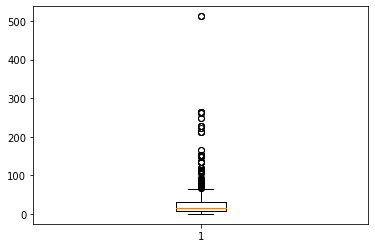

In [457]:
import matplotlib.pyplot as plt
fare_plot = titanic.Fare

plt.boxplot(fare_plot)
plt.show()

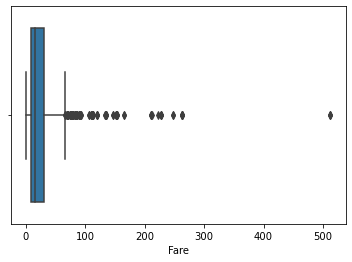

In [31]:
sns.boxplot(titanic.Fare)

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [32]:
from scipy.stats import zscore

In [33]:
tit_data = titanic.copy()

In [34]:
z_score = zscore(tit_data["Fare"])

In [35]:
list(z_score)

[-0.5024451714361923,
 0.7868452935884461,
 -0.4888542575852486,
 0.4207302360686478,
 -0.4863374216869257,
 -0.47811642890864375,
 0.395813560675251,
 -0.22408312108167944,
 -0.4242561406845337,
 -0.04295550208861426,
 -0.312172377522981,
 -0.11384570873513637,
 -0.4863374216869257,
 -0.01870931177853076,
 -0.4902797934380587,
 -0.3262666585535892,
 -0.06199888922968463,
 -0.3866707201133388,
 -0.2859972841804228,
 -0.5029485386158568,
 -0.12491978668775715,
 -0.3866707201133388,
 -0.4867562231804066,
 0.06635974158478332,
 -0.22408312108167944,
 -0.016444159470040135,
 -0.5029485386158568,
 4.647001076532463,
 -0.48977642625839407,
 -0.4894421904510968,
 -0.09027201697708476,
 2.301728820789,
 -0.49237782784290063,
 -0.43700743807979686,
 1.0060617003323709,
 0.39858208016340624,
 -0.5028639729296732,
 -0.4863374216869257,
 -0.2859972841804228,
 -0.42207354059350805,
 -0.4576454924460446,
 -0.22559322262067316,
 -0.4894421904510968,
 0.18876253192945994,
 -0.48977642625839407,
 -0.48

In [39]:
(z_score>3).sum(), (z_score<-3).sum()

(20, 0)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [76]:
z_score.min(), z_score.max()

(-0.6484216535389205, 9.667166525013505)

In [77]:
up_replace_values = tit_data[z_score<=3]["Fare"].max() #Minimum ve maksimum değerleri bulup değitirme uygulanacak.
low_replace_values = tit_data[z_score>=-3]["Fare"].min()

In [78]:
up_replace_values, low_replace_values #Tüm datayı bu değerler içerisine alacağız.

(164.8667, 0.0)

In [79]:
x_df_zscore_replaced = tit_data.copy()
x_df_zscore_replaced["Fare"][z_score>3] = up_replace_values
x_df_zscore_replaced["Fare"][z_score<-3] = low_replace_values

<ipython-input-79-f38102b55be2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df_zscore_replaced["Fare"][z_score>3] = up_replace_values
<ipython-input-79-f38102b55be2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df_zscore_replaced["Fare"][z_score<-3] = low_replace_values


In [80]:
tit_data["Fare"].min(), tit_data["Fare"].max()

(0.0, 512.3292)

In [81]:
x_df_zscore_replaced["Fare"].max() , x_df_zscore_replaced["Fare"].min()

(164.8667, 0.0)

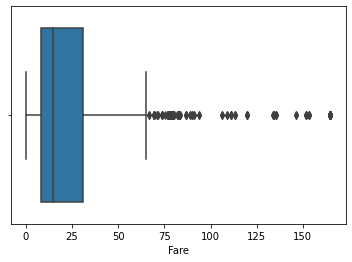

In [167]:
sns.boxplot(x_df_zscore_replaced.Fare)

Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [82]:
from scipy import stats

In [155]:
q1 = tit_data["Fare"].quantile(q=0.25)
q3 = tit_data["Fare"].quantile(q=0.75)

In [156]:
q1 , q3

(7.9104, 31.0)

In [157]:
iqr = stats.iqr(tit_data["Fare"])
iqr

23.0896

In [158]:
upper_limit = q3 + iqr*1.5
lower_limit = q1 - iqr*1.5
upper_limit , lower_limit

(65.6344, -26.724)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [98]:
not_outlier_mask = ~((tit_data["Fare"] > upper_limit) | (tit_data["Fare"] < lower_limit)) 
#Drop edersem nasıl görüneceğini merak ettim.

In [100]:
dropped_data = tit_data[not_outlier_mask]

In [109]:
dropped_data.shape , dropped_data["Fare"].min(), dropped_data["Fare"].max()

((775, 12), 0.0, 65.0)

In [159]:
df_replace = tit_data.copy()

In [160]:
df_replace["Fare"][tit_data["Fare"] > upper_limit]

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

In [161]:
df_replace["Fare"][tit_data["Fare"] > upper_limit] = upper_limit
df_replace["Fare"][tit_data["Fare"] < lower_limit] = lower_limit

<ipython-input-161-6dafe2d2d368>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_replace["Fare"][tit_data["Fare"] > upper_limit] = upper_limit
<ipython-input-161-6dafe2d2d368>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_replace["Fare"][tit_data["Fare"] < lower_limit] = lower_limit


In [162]:
df_replace["Fare"].min(), df_replace["Fare"].max(), df_replace["Fare"].shape

(0.0, 65.6344, (891,))

In [163]:
df_replace

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [165]:
df_replace.Fare.value_counts()

65.6344    116
8.0500      43
13.0000     42
7.8958      38
7.7500      34
          ... 
13.8625      1
25.9250      1
8.4042       1
7.6292       1
22.5250      1
Name: Fare, Length: 204, dtype: int64

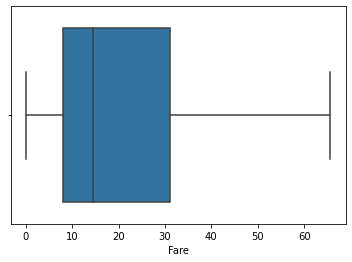

In [166]:
sns.boxplot(df_replace.Fare)

Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [168]:
df_hardedges = tit_data.copy()

In [170]:
lower_limit = df_hardedges["Fare"].quantile(q=0.01)
upper_limit = df_hardedges["Fare"].quantile(q=0.99)

In [171]:
lower_limit, upper_limit

(0.0, 249.00622000000033)

In [173]:
df_hardedges_replace = tit_data.copy()
df_hardedges_replace["Fare"][df_hardedges["Fare"] > upper_limit] = upper_limit
df_hardedges_replace["Fare"][df_hardedges["Fare"] < lower_limit] = lower_limit

<ipython-input-173-b1abc0a8a4a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hardedges_replace["Fare"][df_hardedges["Fare"] > upper_limit] = upper_limit
<ipython-input-173-b1abc0a8a4a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hardedges_replace["Fare"][df_hardedges["Fare"] < lower_limit] = lower_limit


In [176]:
df_hardedges_replace["Fare"].min(), df_hardedges_replace["Fare"].max(), df_hardedges_replace["Fare"].shape

(0.0, 249.00622000000033, (891,))

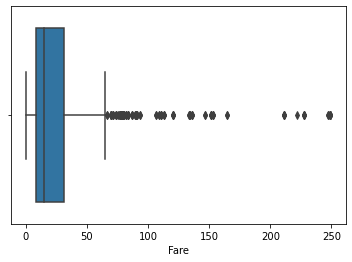

In [177]:
sns.boxplot(df_hardedges_replace["Fare"])

In [178]:
df_hardedges_replace

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

In [182]:
print("Verideki Fare değişkeni absürt outlier değerlere sahip olsa dahi, topluluktaki bilet ücreti dengesizliğini gözlemlemek açısından belirli skalalar içerisinde görülmesi gerekmekte olduğunu düşünüyorum. Dolayısıyla, her ne kadar quantile range metodunda, outlier değerlerini neredeyse sıfıra indirmiş olsak da, daha düşük bir skalada gelir dengesizliğini gözlemek amacıyla 'Hard Edges' methodunu kullanmanın daha mantıklı olabileceğini düşünmekteyim.")

Verideki Fare değişkeni absürt outlier değerlere sahip olsa dahi, topluluktaki bilet ücreti dengesizliğini gözlemlemek açısından belirli skalalar içerisinde görülmesi gerekmekte olduğunu düşünüyorum. Dolayısıyla, her ne kadar quantile range metodunda, outlier değerlerini neredeyse sıfıra indirmiş olsak da, daha düşük bir skalada gelir dengesizliğini gözlemek amacıyla 'Hard Edges' methodunu kullanmanın daha mantıklı olabileceğini düşünmekteyim.
